<a href="https://colab.research.google.com/github/mmilannaik/AirBnB-Exploratory-Data-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project_Individual_Notebook_Milan_Naik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# This is a Individual Notebook of Milan Naik

# Problems to be solved






1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?








# Preliminary Data Processing

In [ ]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=60b5d6e2755e51d933f5562a7bc63f0dc3ddc3c17c52db204a6d25bce5a11776
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyforest
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project/'
df= pd.read_csv(working_dir_path+'Airbnb NYC 2019.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.isnull().sum()
print('The  Null values in last_review are',(df['last_review'].isnull().sum()/len(df)*100))

The  Null values in last_review are 20.55833929849678


So we have some null values in the name of the listings and host_name.It is around 20.55% in last_review data.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Removing the duplicated values if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# Now we want to impute the Null values




# Splitting into Numeric and Categorical data

In [ ]:
# Splitting the dataset into numeric and object type to do our analysis
df.info()
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
numeric_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.7 MB


In [ ]:
objects_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 48879 non-null  object
 1   host_name            48874 non-null  object
 2   neighbourhood_group  48895 non-null  object
 3   neighbourhood        48895 non-null  object
 4   room_type            48895 non-null  object
 5   last_review          38843 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In [ ]:
numeric_ds.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Analysis of Host, Neighbourhood

In [ ]:
df.host_name.value_counts().head(5)

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

In [ ]:
df1= df[['host_name','calculated_host_listings_count']].groupby(['host_name'])['calculated_host_listings_count'].count().nlargest(5)
df1

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: calculated_host_listings_count, dtype: int64

As we can find that Top 5 host name are Michael, David, Sonder(NYC), John and Alex.

In [ ]:
groupped_data = df.groupby(['host_name']).agg({'calculated_host_listings_count': 'sum'})
groupped_data['percentage'] = groupped_data.apply(lambda x: round(100*x / x.sum(),2))
groupped_data =groupped_data.sort_values(by=['percentage'],ascending=False).reset_index()
groupped_data.head(5)

,host_name,calculated_host_listings_count,percentage
0,Sonder (NYC),106929,30.61
1,Blueground,53824,15.41
2,Kara,14679,4.20
3,Kazuya,10609,3.04
4,Jeremy & Laura,9216,2.64


As we can see here that Sonder(NYC) has the highest number of host listing which is to the tune of 30.61% for the Total listing.


In [ ]:
len(df['neighbourhood'].unique())

221

In [ ]:
There are 221 neighbourhoods in the listing data.

In [ ]:
df.groupby('neighbourhood')['host_name'].count().nlargest(10)


neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3714
Harlem                2656
Bushwick              2464
Upper West Side       1970
Hell's Kitchen        1955
East Village          1853
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: host_name, dtype: int64

The Top 10 neighbourhood are from Willamsburg to Midtown.

In [ ]:
neighbourhood_data = df.groupby(['neighbourhood']).agg({'calculated_host_listings_count': 'sum'})
neighbourhood_data['percentage'] = neighbourhood_data.apply(lambda x: round(100*x / x.sum(),2))
neighbourhood_data =neighbourhood_data.sort_values(by=['percentage'],ascending=False).reset_index()
neighbourhood_data.head(5)

,neighbourhood,calculated_host_listings_count,percentage
0,Financial District,85454,24.46
1,Murray Hill,26125,7.48
2,Hell's Kitchen,25169,7.21
3,Midtown,25019,7.16
4,Theater District,18704,5.35


Top 5 neighbourhoods in terms of highest number of listings are from Financial District, Murray Hill, Hell's Kitchen, Midtown and Theater District.

In [ ]:
# Now let's visualize the Neighbourhood group
len(df['neighbourhood_group'].unique())
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

We have 5 neighbour hood group in the newyork listings.

In [ ]:
df.groupby('neighbourhood_group')['host_name'].count().nlargest(5)

neighbourhood_group
Manhattan        21652
Brooklyn         20095
Queens            5664
Bronx             1090
Staten Island      373
Name: host_name, dtype: int64

In [ ]:
pd.crosstab(index=df['neighbourhood_group'], columns=df['room_type'],margins = True, margins_name = 'Total')

room_type,Entire home/apt,Private room,Shared room,Total
neighbourhood_group,,,,
Bronx,379,652,60,1091
Brooklyn,9559,10132,413,20104
Manhattan,13199,7982,480,21661
Queens,2096,3372,198,5666
Staten Island,176,188,9,373
Total,25409,22326,1160,48895


In [ ]:
We can see that Manhattan has maximum number of listings followed by Brooklyn and Queens.
There are very less shared room.
Entire home/apt and Private room are equally distributed.

In [ ]:
df_area = pd.crosstab(index=df['neighbourhood_group'], columns=df['room_type'],margins = True, margins_name = 'Total',normalize=True)/round(4)*100
df_area

room_type,Entire home/apt,Private room,Shared room,Total
neighbourhood_group,,,,
Bronx,0.193783,0.333367,0.030678,0.557828
Brooklyn,4.887514,5.180489,0.211167,10.279170
Manhattan,6.748645,4.081194,0.245424,11.075263
Queens,1.071684,1.724103,0.101237,2.897024
Staten Island,0.089989,0.096124,0.004602,0.190715
Total,12.991615,11.415278,0.593108,25.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

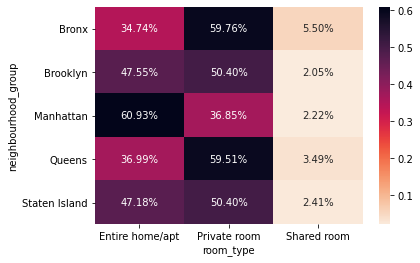

In [ ]:
sns.heatmap(pd.crosstab(index=df['neighbourhood_group'], columns=df['room_type'],normalize='index'), 
            cmap='rocket_r', annot=True, fmt='.2%');

In the Plot, the % distribution in the Rowwise.
Queens and Bronx have higher percentage of Private Room
Manhattan has highest Entire home compared to others.

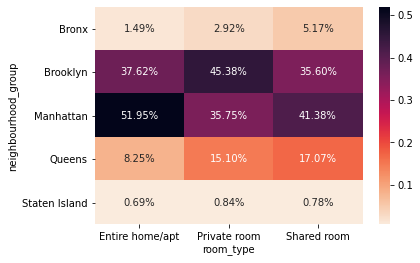

In [ ]:
sns.heatmap(pd.crosstab(index=df['neighbourhood_group'], columns=df['room_type'],normalize='columns'), 
            cmap='rocket_r', annot=True, fmt='.2%');

In the Plot, the % distribution in the Column wise.
Manhattan is leading in terms of Entire home/apt and Shared room category.
Brooklyn has higher share of Private Room.


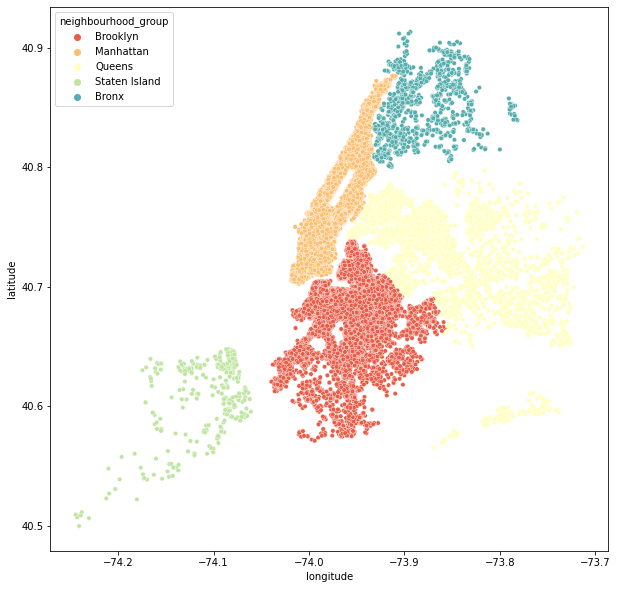

In [ ]:
#Let's visualize the Plots
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df, palette="Spectral")

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Host Name and Reviews

Let's see the average number of listings for the Top 10 hostids

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Lets find out the Top 10 host id
df_host = df.host_id.value_counts().head(10).reset_index()
df_host

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [ ]:
# Let's look at 
df.groupby(['neighbourhood','host_id'], sort=True)['host_id'].count().sort_values(ascending=False).head(10)

neighbourhood       host_id  
Financial District  219517861    218
Greenpoint          7503643       52
Financial District  12243051      51
Murray Hill         219517861     50
                    120762452     50
Midtown             205031545     49
Hell's Kitchen      190921808     46
                    30283594      41
Chelsea             107434423     37
Woodside            137358866     35
Name: host_id, dtype: int64

Here we can find out that Top 10 hosta and their  corresponding neighbourhood .
So Financial district has highest number of hosts.


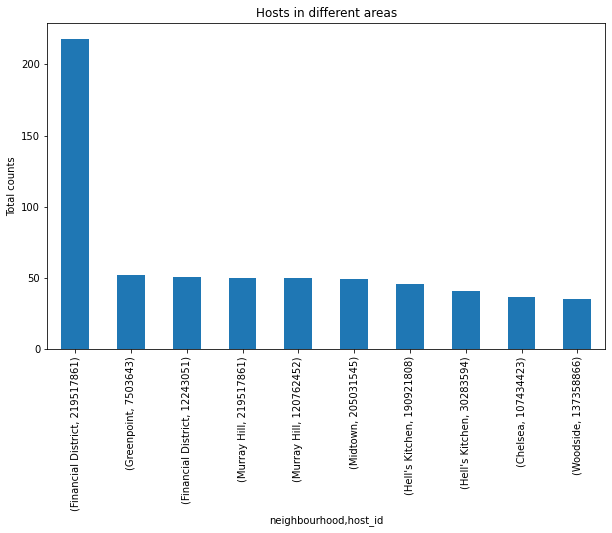

In [ ]:
# Let's plot the above data to find out in a graphical way
plt.figure(figsize=(10,6))
plt.title("Hosts in different areas")
plt.xlabel("Neighbourhood")
plt.ylabel("Total counts")
df.groupby(['neighbourhood','host_id'], sort=True)['host_id'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
# Let's find out the Neighbourhood group for the busiest hosts
df.groupby(['neighbourhood','neighbourhood_group','host_id'], sort=True)['host_id'].count().sort_values(ascending=False).head(10)

neighbourhood       neighbourhood_group  host_id  
Financial District  Manhattan            219517861    218
Greenpoint          Brooklyn             7503643       52
Financial District  Manhattan            12243051      51
Murray Hill         Manhattan            219517861     50
                                         120762452     50
Midtown             Manhattan            205031545     49
Hell's Kitchen      Manhattan            190921808     46
                                         30283594      41
Chelsea             Manhattan            107434423     37
Woodside            Queens               137358866     35
Name: host_id, dtype: int64

We can see that Financial district has host who is the busiest one.
Maximum busiest hots are present in the Manhattan area.

In [ ]:
df.groupby(['neighbourhood_group']).agg({'host_id':'count','price':'mean','availability_365':'mean'}).sort_values(by='host_id')

,host_id,price,availability_365
neighbourhood_group,,,
Staten Island,373,114.812332,199.678284
Bronx,1091,87.496792,165.758937
Queens,5666,99.517649,144.451818
Brooklyn,20104,124.383207,100.232292
Manhattan,21661,196.875814,111.979410


In [ ]:
df_host = df.groupby(['host_id'])['neighbourhood'].count().sort_values(ascending=False).head(10).reset_index()
df_host

,host_id,neighbourhood
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [ ]:
df_top_10 = df_host['host_id'].tolist()

In [ ]:
df.groupby(['neighbourhood_group',df['host_id'].isin(df_top_10)]).agg({'host_id':'count','price':'mean','availability_365':'mean'})

host_id       price  availability_365
neighbourhood_group host_id                                       
Bronx               False       1091   87.496792        165.758937
Brooklyn            False      20043  124.322706         99.650901
                    True          61  144.262295        291.262295
Manhattan           False      20531  194.164483        102.372266
                    True        1130  246.138053        286.531858
Queens              False       5587  100.303741        143.750492
                    True          79   43.924051        194.050633
Staten Island       False        373  114.812332        199.678284

 

*   So here we can find out that our Top 10 host are only from Manhattan,  Queens & Brooklyn
*    We can find out that average availabiity of rooms in Brooklyn is highest which is 291 followed by Manhattan and Queens.






In [ ]:
df.groupby(['neighbourhood_group']).agg({'host_id':'count','price':'mean','availability_365':'mean','number_of_reviews':'mean','reviews_per_month':'mean'}).sort_values(by='host_id')

,host_id,price,availability_365,number_of_reviews,reviews_per_month
neighbourhood_group,,,,,
Staten Island,373,114.812332,199.678284,30.941019,1.872580
Bronx,1091,87.496792,165.758937,26.004583,1.837831
Queens,5666,99.517649,144.451818,27.700318,1.941200
Brooklyn,20104,124.383207,100.232292,24.202845,1.283212
Manhattan,21661,196.875814,111.979410,20.985596,1.272131




1.  On a average, availability of rooms are highest in Staten Island and lowest in Manhattan.
2.   Number of reviews is highesr in staten island and lowest in Manhattan
3.   However, reviews per month is highest in Queens followed by Staten Island and is lowest in Manhattan

 ## Question 4 :Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
import folium
from folium.plugins import FastMarkerCluster

Lat=40.80
Long=-73.80

locations = list(zip(df.latitude, df.longitude))

map_nyc = folium.Map(location=[Lat,Long], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map_nyc)
map_nyc

As we can see that maximum number of listings are in the Manhattan & Brooklyn which indicates the numbers in the above map.

In [ ]:
# Here we can find the Top 10 host ids and their count

,index,host_id
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [ ]:
df_top_10

[219517861,
 107434423,
 30283594,
 137358866,
 16098958,
 12243051,
 61391963,
 22541573,
 200380610,
 7503643]

In [ ]:
df[df.host_id.isin(df_top_10)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2631,1390532,Amazing Designer Loft in BK Factory,7503643,Vida,Brooklyn,Greenpoint,40.72456,-73.94343,Entire home/apt,129,30,7,2019-03-27,0.11,52,189
2636,1392673,Spacious Factory Converted Loft,7503643,Vida,Brooklyn,Greenpoint,40.72756,-73.94230,Entire home/apt,129,30,6,2018-09-02,0.09,52,249
2708,1460017,Lovely Factory Loft in Greenpoint!,7503643,Vida,Brooklyn,Greenpoint,40.72732,-73.94076,Entire home/apt,129,30,6,2018-09-11,0.08,52,277
2749,1486099,All New Bohemian Chic 1BR Loft,7503643,Vida,Brooklyn,Greenpoint,40.72267,-73.94362,Entire home/apt,149,30,9,2018-02-18,0.13,52,343
2782,1524302,Huge 1 Bedroom Loft at Habitat 101!,7503643,Vida,Brooklyn,Greenpoint,40.72686,-73.94177,Entire home/apt,149,30,7,2018-10-31,0.11,52,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,NaN,232,188


# Prices and Reviews

In [ ]:
pd.crosstab(index= df['neighbourhood_group'],columns=df['room_type'],values=df['price'],
            aggfunc=np.mean).round(0)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,128.0,67.0,60.0
Brooklyn,178.0,77.0,51.0
Manhattan,249.0,117.0,89.0
Queens,147.0,72.0,69.0
Staten Island,174.0,62.0,57.0


1. We can see that Manhattan has the highest average price of the home.
2. Brooklyn and States Island has average same price.
3. Private cost very high in Brooklyn.
4. As obvious, shared room price is cheaper.
5. But Manhattan shared room's  price is higher than any other neighbourhood group.

In [ ]:
pd.crosstab(index= df['neighbourhood_group'],columns=df['room_type'],values=df['minimum_nights'],
aggfunc=np.mean).round(0)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,6.0,4.0,3.0
Brooklyn,7.0,6.0,8.0
Manhattan,11.0,5.0,7.0
Queens,5.0,5.0,4.0
Staten Island,6.0,4.0,2.0




1. In general, Entire home category has the highest minimum nights. It can be inferred that People tend to spend much time in the entire home than than private or shared room.
2. Manhattan has the higher share of minimum nights in the entire home category.
3. Brooklyn has the highest minimum nights in the shared room type than others.


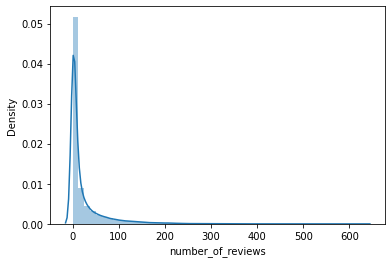

In [ ]:
sns.distplot(df['number_of_reviews'])


*   As we cann see from the above that the number of reviews is right skewed distribution . So here, the mean is greater than median.

*   We had to impute the Null values by the median.

